<a href="https://colab.research.google.com/github/RahafYaseen/Data-Analysis2-SENTIMENTAL/blob/main/Sentimental.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score
from wordcloud import WordCloud
from collections import Counter
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
import string

nltk.download('punkt')
nltk.download('stopwords')
import plotly.express as px
import re
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer

stop_words = stopwords.words()

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
df = pd.read_csv('spam.csv',encoding='latin-1')

In [ ]:
df.sample(5)

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
452,ham,K:)k:)what are detail you want to transfer?acc...,NaN,NaN,NaN
2719,ham,Go where n buy? Juz buy when we get there lar.,NaN,NaN,NaN
5203,ham,Me fine..absolutly fine,NaN,NaN,NaN
1534,ham,Remember on that day..,NaN,NaN,NaN
2876,ham,twenty past five he said will this train have ...,NaN,NaN,NaN


In [ ]:
#1. Data Cleaning

In [ ]:
# drop last 3 cols
df.drop(columns=['Unnamed: 2','Unnamed: 3','Unnamed: 4'],inplace=True)

In [ ]:
df.sample(5)

,v1,v2
2015,ham,Just re read it and I have no shame but tell m...
1634,spam,"Eerie Nokia tones 4u, rply TONE TITLE to 8007 ..."
834,ham,Surely result will offer:)
1143,ham,And is there a way you can send shade's stuff ...
3578,ham,Multiply the numbers independently and count d...


In [ ]:
# renaming the cols
df.rename(columns={'v1':'target','v2':'text'},inplace=True) #to rename the columns
df.sample(5)  # returns unordered data

,target,text
72,ham,HI BABE IM AT HOME NOW WANNA DO SOMETHING? XX
2157,ham,Sad story of a Man - Last week was my b'day. M...
480,ham,"Almost there, see u in a sec"
1430,ham,Don't look back at the building because you ha...
4753,ham,Ok lor... Or u wan me go look 4 u?


In [ ]:

import sklearn

In [ ]:
from sklearn.preprocessing import LabelEncoder # used to convert ham and spam to 0 and 1
encoder = LabelEncoder()

In [ ]:
df['target'] = encoder.fit_transform(df['target']) # transforms selected columns to 0 and 1

In [ ]:
df.head() # returns ordered data

,target,text,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",nah think goe usf live around though


In [ ]:
#missing values
df.isnull().sum()

,0
target,0
text,0
transformed_text,0


In [ ]:
# duplicate values
df.duplicated().sum()

0

In [ ]:
# remove duplicate values
df = df.drop_duplicates(keep='first')

In [ ]:
df.duplicated().sum()

0

In [ ]:
df.shape # used to see the total data

(5169, 3)

In [ ]:
#EDA

In [ ]:
df['target'].value_counts()

,count
target,
0,4516
1,653


In [ ]:

import matplotlib.pyplot as plt

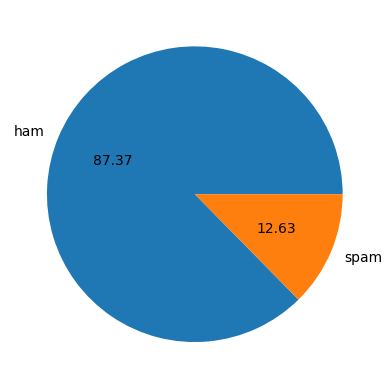

In [ ]:
# used to plot graphs
plt.pie(df['target'].value_counts(), labels=['ham','spam'],autopct="%0.2f")
plt.show()

In [ ]:
## the data is unbalanced as pct of ham is high compared to the spam

In [ ]:

import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [ ]:
## we can observe by seeing the difference between ham and spam messages, that spam messages have
# more characters, words and sentences per message than ham.

In [ ]:

# We can show this difference by plotting a histogram using this library
import seaborn as sns

In [ ]:
#Data Preprocessing

In [ ]:
def transform_text(text): # it is a function definition with text as an argument
    text = text.lower() #to convert in lowercase
    text = nltk.word_tokenize(text) # to divide in words

    y = []
    for i in text:        # to remove special char
        if i.isalnum():  # if i is alphanumeric
            y.append(i)  #

            text = y[:]
    y.clear()

    for i in text:
        if i not in stopwords.words('english') and i not in string.punctuation: # used to remove the stopwords and punctuation
            y.append(i)

            text = y[:]
    y.clear()

    for i in text:
        y.append(ps.stem(i))

    # return y # to show the output
    return " ".join(y)   # join method is used for strings which puts spaces or other characters between them

In [ ]:
nltk.download('stopwords')
from nltk.corpus import stopwords

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
stopwords.words('english')

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [ ]:
import string
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [ ]:
from nltk.stem.porter import PorterStemmer
ps = PorterStemmer()     # making an object of PorterStemmer
ps.stem('loving')

'love'

In [ ]:
transform_text('Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...')

'go jurong point crazi avail bugi n great world la e buffet cine got amor wat'

In [ ]:
df['text'][0]

'Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...'

In [ ]:
df['transformed_text'] = df['text'].apply(transform_text) # applied the transform_text function on text column

In [ ]:
df.head()

,target,text,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",nah think goe usf live around though


In [ ]:
# We will create a wordcloud which will display the important(or most used) words in a message with increased height and width
# To create a wordcloud for spam message
from wordcloud import WordCloud
wc = WordCloud(width=500,height=500,min_font_size=10,background_color='white') # making an object of wordcloud and setting height and width

In [ ]:
spam_wc = wc.generate(df[df['target'] == 0]['transformed_text'].str.cat(sep=" "))

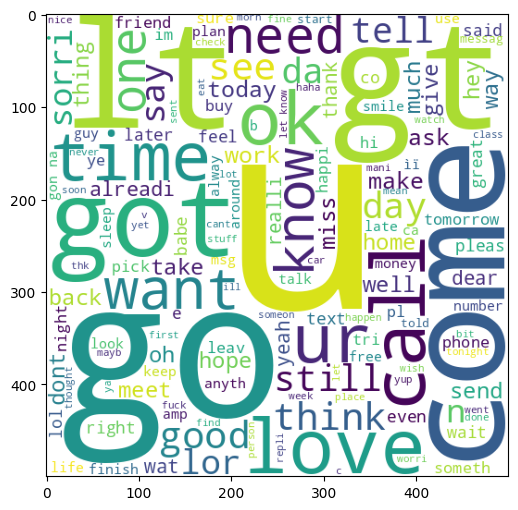

In [ ]:
plt.figure(figsize=(15,6))
plt.imshow(spam_wc)

In [ ]:
ham_wc = wc.generate(df[df['target'] == 0]['transformed_text'].str.cat(sep=" "))

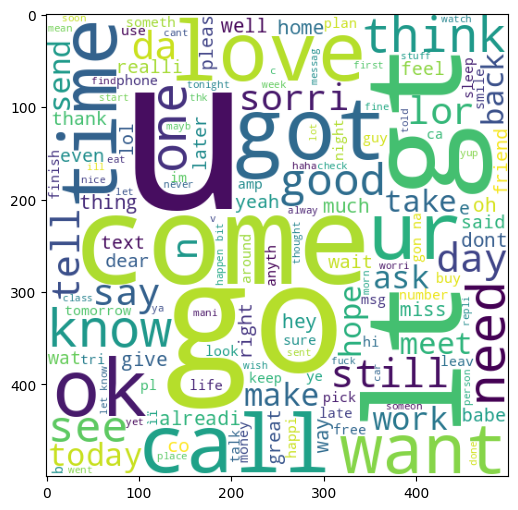

In [ ]:
plt.figure(figsize=(15,6))
plt.imshow(ham_wc)

In [ ]:
df[df['target']==1] # extracting rows with target=1

,target,text,transformed_text
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,free entri 2 wkli comp win fa cup final tkt 21...
5,1,FreeMsg Hey there darling it's been 3 week's n...,freemsg hey darl 3 week word back like fun sti...
8,1,WINNER!! As a valued network customer you have...,winner valu network custom select receivea pri...
9,1,Had your mobile 11 months or more? U R entitle...,mobil 11 month u r entitl updat latest colour ...
11,1,"SIX chances to win CASH! From 100 to 20,000 po...",six chanc win cash 100 pound txt csh11 send co...
...,...,...,...
5537,1,Want explicit SEX in 30 secs? Ring 02073162414...,want explicit sex 30 sec ring 02073162414 cost...
5540,1,ASKED 3MOBILE IF 0870 CHATLINES INCLU IN FREE ...,ask 3mobil 0870 chatlin inclu free min india c...
5547,1,Had your contract mobile 11 Mnths? Latest Moto...,contract mobil 11 mnth latest motorola nokia e...
5566,1,REMINDER FROM O2: To get 2.50 pounds free call...,remind o2 get pound free call credit detail gr...


In [ ]:
spam_corpus = []
for msg in df[df['target']==1]['transformed_text'].tolist():    #tolist() is used to convert into a list
     for word in msg.split():    # to separate the words
        spam_corpus.append(word)

In [ ]:
len(spam_corpus)

9939

In [ ]:
from collections import Counter
Counter(spam_corpus).most_common(10) # counts the number of top 30 most repeated words

[('call', 320),
 ('free', 191),
 ('2', 155),
 ('txt', 141),
 ('text', 122),
 ('u', 119),
 ('ur', 119),
 ('mobil', 114),
 ('stop', 104),
 ('repli', 103)]

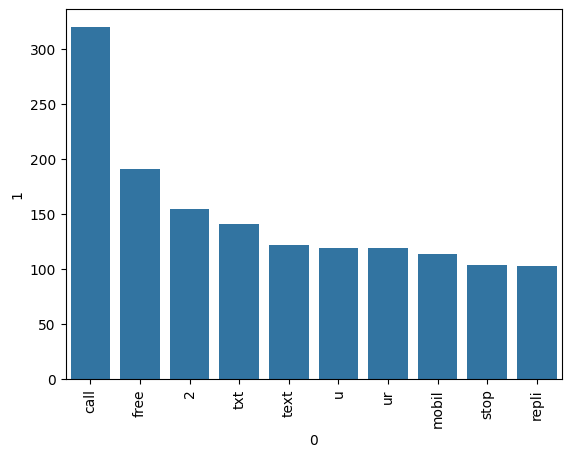

In [ ]:
from collections import Counter
# we have put the top 30 words in a dataframe and made a barplot
sns.barplot(x=pd.DataFrame(Counter(spam_corpus).most_common(10))[0],y=pd.DataFrame(Counter(spam_corpus).most_common(10))[1])
plt.xticks(rotation='vertical') # xticks sets the x-axis tick values, which are the locations along the x-axis where the tick marks appear
plt.show()

In [ ]:
ham_corpus = []
for msg in df[df['target']==0]['transformed_text'].tolist():    #tolist() is used to convert into a list
     for word in msg.split():    # to separate the words
        ham_corpus.append(word)

In [ ]:
len(ham_corpus)

35429

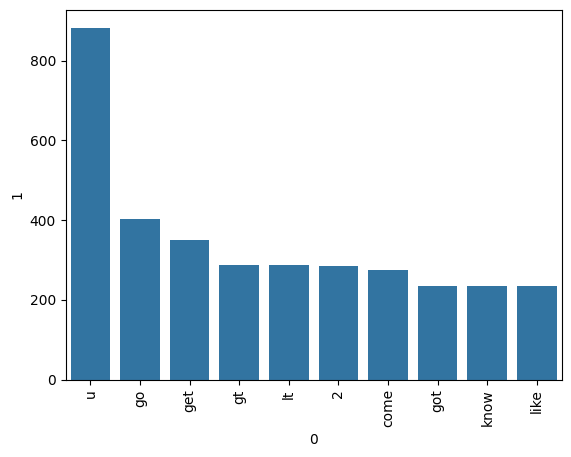

In [ ]:
from collections import Counter
# we have put the top 30 words in a dataframe and made a barplot
sns.barplot(x=pd.DataFrame(Counter(ham_corpus).most_common(10))[0],y=pd.DataFrame(Counter(ham_corpus).most_common(10))[1])
plt.xticks(rotation='vertical')
plt.show()

In [ ]:
# Text Vectorization
# using Bag of Words
df.head()

,target,text,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",nah think goe usf live around though


In [ ]:
#Model Building

In [ ]:
 # We will create a ml model using naive bayes algo as it works best for textual data. For any ml model, numerical input is required, So, we
 # will convert the text messages into vectors(numbers) using bag of words method and tf-idf method

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
cv = CountVectorizer()
tfidf = TfidfVectorizer(max_features=3000) # max features will only select the top 3000 words(to be vectorized) form the corpus

In [ ]:
X = tfidf.fit_transform(df['transformed_text']).toarray()

In [ ]:
X.shape # output will be(no. of messages, total no. of words)

(5169, 3000)

In [ ]:
y = df['target'].values
y

array([0, 0, 1, ..., 0, 0, 0])

In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=2) # splitting the data into train set and test set

# “random_state” is a parameter in train_test_split that controls the random number generator used to shuffle the data before splitting it.
# In other words, it ensures that the same randomization is used each time you run the code, resulting in the same splits of the data.

In [ ]:
from sklearn.naive_bayes import GaussianNB,MultinomialNB,BernoulliNB
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score #(as the spam classifier is a high precision model)

In [ ]:
# creating object of each imported algo(as we dont know the distribution of data so we imported three distributions)
gnb = GaussianNB()
mnb = MultinomialNB()
bnb = BernoulliNB()

In [ ]:
# Training the gnb model
gnb.fit(X_train, y_train)
y_pred1 = gnb.predict(X_test)
print(accuracy_score(y_test,y_pred1))
print(confusion_matrix(y_test,y_pred1))
print(precision_score(y_test,y_pred1))

0.8723404255319149
[[789 107]
 [ 25 113]]
0.5136363636363637


In [ ]:
# Training the mnb model
mnb.fit(X_train, y_train)
y_pred2 = mnb.predict(X_test)
print(accuracy_score(y_test,y_pred2))
print(confusion_matrix(y_test,y_pred2))
print(precision_score(y_test,y_pred2))

0.9709864603481625
[[896   0]
 [ 30 108]]
1.0


In [ ]:
# Training the bnb model
bnb.fit(X_train, y_train)
y_pred3 = bnb.predict(X_test)
print(accuracy_score(y_test,y_pred3))
print(confusion_matrix(y_test,y_pred3))
print(precision_score(y_test,y_pred3))

0.9835589941972921
[[895   1]
 [ 16 122]]
0.991869918699187


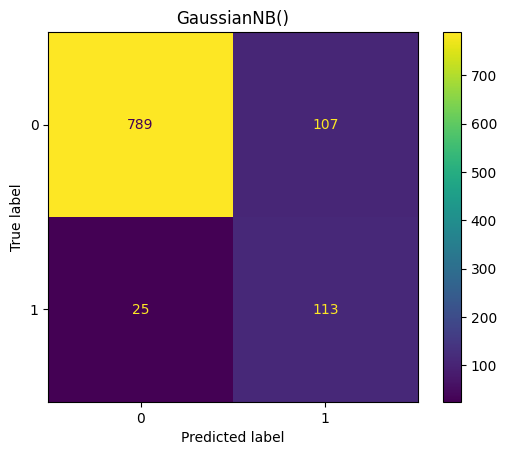

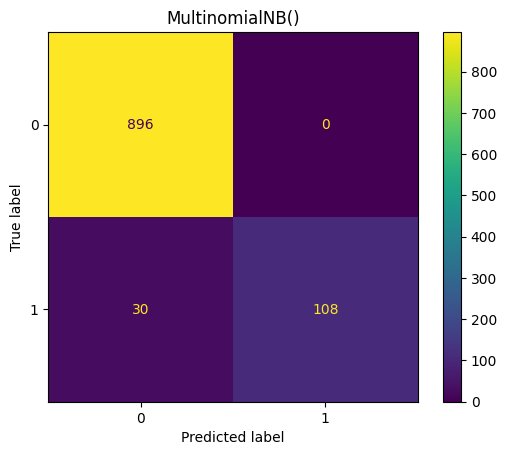

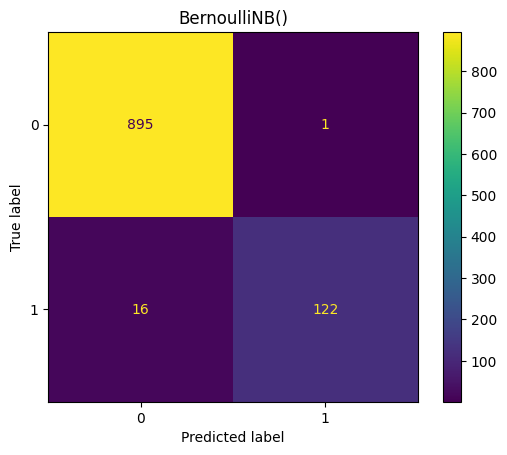

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import warnings
warnings.filterwarnings("ignore")
k= [gnb,mnb,bnb]
for i in k:
     # Create the ConfusionMatrixDisplay object
    cm = confusion_matrix(y_test, i.predict(X_test)) # Calculate confusion matrix
    disp = ConfusionMatrixDisplay(confusion_matrix=cm)
    # Plot the confusion matrix
    disp.plot()
    plt.title(str(i)) # Convert i to string for title
    plt.show()

0.849710468426501 0.982037719979296 0.9854991589026916


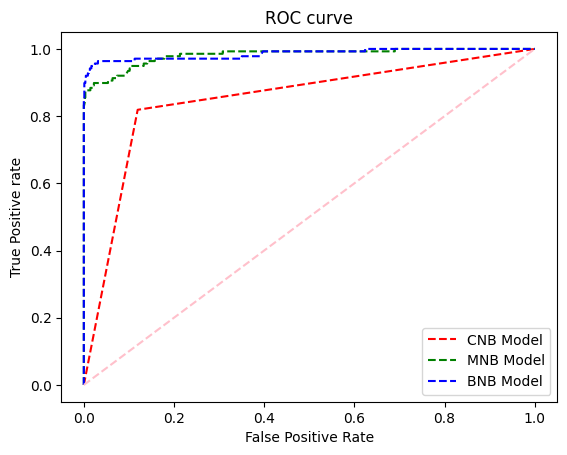

In [ ]:
from sklearn.metrics import roc_curve

# predict probabilities for gnb, mnb, bnb models:
# Assign the predict_proba results to the correct variable names
CNB_prob = gnb.predict_proba(X_test) # Changed CNB to gnb
MNB_prob = mnb.predict_proba(X_test) # Changed MNB to mnb
BNB_prob = bnb.predict_proba(X_test) # Changed BNB to bnb

# roc curve for models
fpr1, tpr1, thresh1 = roc_curve(y_test, CNB_prob[:,1], pos_label=1)
fpr2, tpr2, thresh2 = roc_curve(y_test, MNB_prob[:,1], pos_label=1)
fpr3, tpr3, thresh3 = roc_curve(y_test, BNB_prob[:,1], pos_label=1)

# roc curve for tpr = fpr
random_probs = [0 for i in range(len(y_test))]
p_fpr, p_tpr, _ = roc_curve(y_test, random_probs, pos_label=1)


# auc scores
from sklearn.metrics import roc_auc_score
auc_CNB = roc_auc_score(y_test, CNB_prob[:,1])
auc_MNB = roc_auc_score(y_test, MNB_prob[:,1])
auc_BNB = roc_auc_score(y_test, BNB_prob[:,1])
print(auc_CNB, auc_MNB,auc_BNB) # plot roc curves
plt.plot(fpr1, tpr1, linestyle='--',color='red', label='CNB Model') # You might want to change the label to 'GNB Model' for consistency
plt.plot(fpr2, tpr2, linestyle='--',color='green', label='MNB Model')
plt.plot(fpr3, tpr3, linestyle='--',color='blue', label='BNB Model')
plt.plot(p_fpr, p_tpr, linestyle='--', color='pink')

# title
plt.title('ROC curve')
# x label
plt.xlabel('False Positive Rate')
# y label
plt.ylabel('True Positive rate')

plt.legend(loc='best')
plt.savefig('ROC',dpi=300)
plt.show();